In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# a nice way of filtering out deprecated warnings
import warnings
warnings.filterwarnings("ignore")


In [2]:
#import dataset
yellow_01=pd.read_csv("cleaned_yellow01.csv")
yellow_02=pd.read_csv("cleaned_yellow02.csv")
yellow_03=pd.read_csv("cleaned_yellow03.csv")


In [3]:
yellow_01 = yellow_01.append([yellow_02, yellow_03])

In [4]:
climate=pd.read_csv("climate.csv")

In [5]:
#get the date and hour for future plotting
yellow_01['date']=yellow_01['tpep_pickup_datetime'].str[5:10]
date_count=yellow_01['date'].value_counts().sort_index()
date_count

01-01    125332
01-02    122363
01-03    140954
01-04    151014
01-05    153345
          ...  
03-27    116650
03-28    122515
03-29    118260
03-30    118076
03-31     99168
Name: date, Length: 90, dtype: int64

In [6]:
yellow_01['pick_up_time']=pd.to_datetime(yellow_01['tpep_pickup_datetime']).dt.hour

In [7]:
gp_col='date'
amount_mean = yellow_01.groupby(gp_col)['total_amount'].mean()
date_count=yellow_01['date'].value_counts().sort_index()
labels=date_count.index
x=np.arange(len(labels))

No handles with labels found to put in legend.


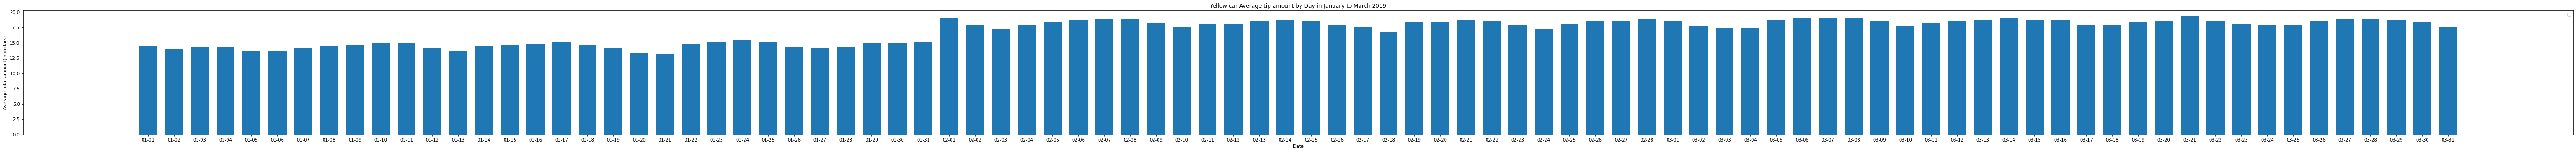

In [8]:
#plot the average total amount every day from 2019-01 to 2019-03
fig, ax = plt.subplots(figsize=(100, 5))
ax.bar(x,amount_mean,width=0.7)
ax.set_xticks(x)
ax.set_xlabel('Date')
ax.set_xticklabels(labels)
ax.set_ylabel('Average total amount(in dollars)')
ax.set_title('Yellow car Average tip amount by Day in January to March 2019')
ax.legend()
plt.savefig('Yellow car Average tip amount by Day in January to March 2019.jpg')

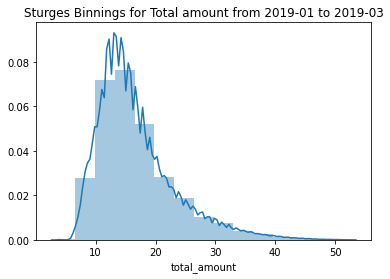

In [9]:
# dataframes method that may be of use
MAX = yellow_01['total_amount'].max()
MIN = yellow_01['total_amount'].min()
SD = yellow_01['total_amount'].std()
IQR = yellow_01['total_amount'].quantile()
N = len(yellow_01)
fig1 = sns.distplot(yellow_01['total_amount'], bins=15)
plt.title("Sturges Binnings for Total amount from 2019-01 to 2019-03")
plt.savefig("Sturges Binnings for Total amount from 2019-01 to 2019-03.jpg")
plt.show()

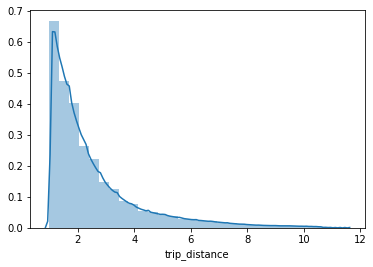

<Figure size 432x288 with 0 Axes>

In [30]:
data = yellow_01.loc[yellow_01['trip_distance'] <= 15, 'trip_distance']

sns.distplot(data, bins=30)
plt.show()
plt.savefig('trip distance 2019-01-03.jpg')

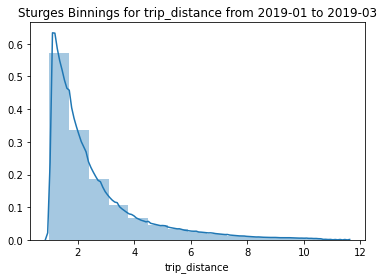

In [31]:


# dataframes method that may be of use
MAX = yellow_01['trip_distance'].max()
MIN = yellow_01['trip_distance'].min()
SD = yellow_01['trip_distance'].std()
IQR = yellow_01['trip_distance'].quantile()
N = len(yellow_01)
fig1 = sns.distplot(yellow_01['trip_distance'], bins=15)
plt.title("Sturges Binnings for trip_distance from 2019-01 to 2019-03")
plt.savefig("Sturges Binnings for trip_distance from 2019-01 to 2019-03.jpg")
plt.show()

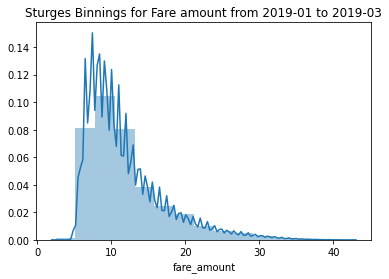

In [11]:
# dataframes method that may be of use
MAX = yellow_01['fare_amount'].max()
MIN = yellow_01['fare_amount'].min()
SD = yellow_01['fare_amount'].std()
IQR = yellow_01['fare_amount'].quantile()
N = len(yellow_01)
fig1 = sns.distplot(yellow_01['fare_amount'], bins=15)
plt.title("Sturges Binnings for Fare amount from 2019-01 to 2019-03")
plt.savefig("Sturges Binnings for Fare amount from 2019-01 to 2019-03.jpg")
plt.show()

In [12]:
yellow_01['time']=pd.to_datetime(
    yellow_01['tpep_dropoff_datetime'])-pd.to_datetime(yellow_01['tpep_pickup_datetime'])
yellow_01['trip_duration']=yellow_01['time'].dt.total_seconds()


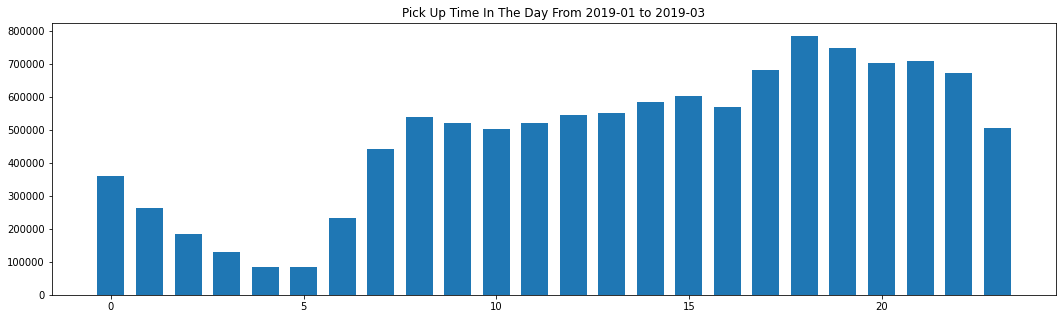

In [13]:
hour_count=yellow_01['pick_up_time'].value_counts().sort_index()
labels=hour_count.index
x=np.arange(len(labels))
fig, ax = plt.subplots(figsize=(18, 5))
ax.bar(x,hour_count,width=0.7)
plt.title("Pick Up Time In The Day From 2019-01 to 2019-03")
plt.savefig("Pick Up Time In The Day From 2019-01 to 2019-03.jpg")

In [14]:
d = pd.DataFrame(yellow_01,columns=['pick_up_time',
                                  'trip_distance','fare_amount','tip_amount','trip_duration','total_amount'])
d.describe()

,pick_up_time,trip_distance,fare_amount,tip_amount,trip_duration,total_amount
count,1.152430e+07,1.152430e+07,1.152430e+07,1.152430e+07,1.152430e+07,1.152430e+07
mean,1.400459e+01,2.514471e+00,1.180180e+01,2.341749e+00,1.056102e+03,1.673291e+01
std,6.190805e+00,1.688453e+00,5.337213e+00,1.538877e+00,4.348853e+03,6.552673e+00
min,0.000000e+00,1.000000e+00,2.500000e+00,0.000000e+00,-1.845600e+05,3.300000e+00
25%,1.000000e+01,1.390000e+00,8.000000e+00,1.460000e+00,5.310000e+02,1.230000e+01
50%,1.500000e+01,1.910000e+00,1.050000e+01,2.260000e+00,7.500000e+02,1.530000e+01
75%,1.900000e+01,3.000000e+00,1.400000e+01,3.080000e+00,1.068000e+03,1.956000e+01
max,2.300000e+01,1.148000e+01,4.250000e+01,1.340000e+01,2.618881e+06,5.280000e+01


In [15]:
df=yellow_01

In [16]:
# pearson (by default) correlation table for distance and fare amount
df[['trip_distance','total_amount']].corr(method='pearson')

,trip_distance,total_amount
trip_distance,1.000000,0.864821
total_amount,0.864821,1.000000


In [17]:
yellow_01['time']=pd.to_datetime(yellow_01['tpep_dropoff_datetime']).dt.time

In [18]:

# dataframes method that may be of use
MAX = yellow_01['tip_amount'].max()
MIN = yellow_01['tip_amount'].min()
SD = yellow_01['tip_amount'].std()
IQR = yellow_01['tip_amount'].quantile()
N = len(yellow_01)

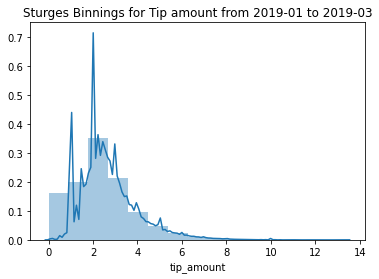

In [33]:
fig1 = sns.distplot(yellow_01['tip_amount'], bins=15)
plt.title("Sturges Binnings for Tip amount from 2019-01 to 2019-03")
plt.savefig("Sturges Binnings for Tip amount from 2019-01 to 2019-03.jpg")
plt.show()


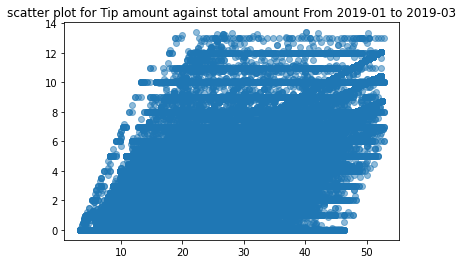

In [20]:
#scatter plot for tip amount against total amount
x=yellow_01['tip_amount']
y=yellow_01['total_amount']
plt.scatter(y, x, alpha=0.5)
plt.title("scatter plot for Tip amount against total amount From 2019-01 to 2019-03")
plt.savefig("scatter plot for Tip amount against total amount From 2019-01 to 2019-03.jpg")
plt.show()

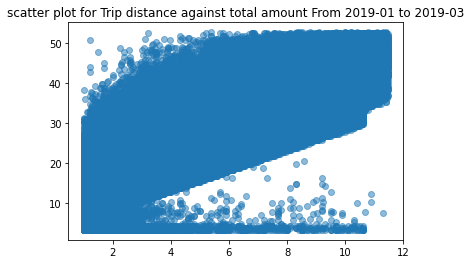

In [21]:
#scatter plot for trip_distance against total amount
y=yellow_01['total_amount']
x=yellow_01['trip_distance']
plt.scatter(x, y, alpha=0.5)
plt.title("scatter plot for Trip distance against total amount From 2019-01 to 2019-03")
plt.savefig("scatter plot for Trip distance against total amount From 2019-01 to 2019-03.jpg")
plt.show()

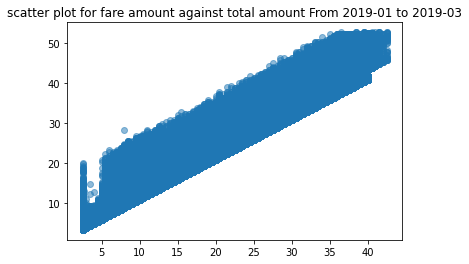

In [22]:
#scatter plot for fare amount against total amount
y=yellow_01['total_amount']
x=yellow_01['fare_amount']
plt.scatter(x, y, alpha=0.5)
plt.title("scatter plot for fare amount against total amount From 2019-01 to 2019-03")
plt.savefig("scatter plot for fare amount against total amount From 2019-01 to 2019-03.jpg")
plt.show()

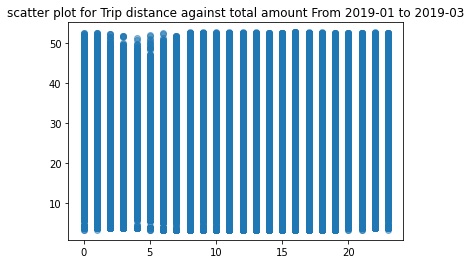

In [23]:
#scatter plot for fare amount against total amount
y=yellow_01['total_amount']
x=yellow_01['pick_up_time']
plt.scatter(x, y, alpha=0.5)
plt.title("scatter plot for Trip distance against total amount From 2019-01 to 2019-03")
plt.savefig("scatter plot for Trip distance against total amount From 2019-01 to 2019-03.jpg")
plt.show()

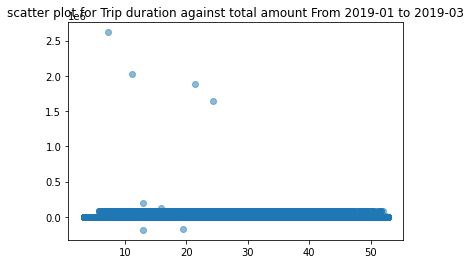

In [24]:
#scatter plot for fare amount against total amount
x=yellow_01['total_amount']
y=yellow_01['trip_duration']
plt.scatter(x, y, alpha=0.5)
plt.title("scatter plot for Trip duration against total amount From 2019-01 to 2019-03")
plt.savefig("scatter plot for Trip duration against total amount From 2019-01 to 2019-03.jpg")
plt.show()

In [25]:
yellow_01

,Unnamed: 0,index,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,date,pick_up_time,time,trip_duration
0,0,0,1,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.50,1,N,151,...,0.5,1.65,0.0,0.3,9.95,NaN,01-01,0,00:53:20,400.0
1,1,1,1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.60,1,N,239,...,0.5,1.00,0.0,0.3,16.30,NaN,01-01,0,01:18:59,1152.0
2,2,7,1,2019-01-01 00:21:28,2019-01-01 00:28:37,1,1.30,1,N,163,...,0.5,1.25,0.0,0.3,9.05,NaN,01-01,0,00:28:37,429.0
3,3,8,1,2019-01-01 00:32:01,2019-01-01 00:45:39,1,3.70,1,N,229,...,0.5,3.70,0.0,0.3,18.50,NaN,01-01,0,00:45:39,818.0
4,4,9,1,2019-01-01 00:57:32,2019-01-01 01:09:32,2,2.10,1,N,141,...,0.5,1.70,0.0,0.3,13.00,NaN,01-01,0,01:09:32,720.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3602044,3602044,7832516,2,2019-03-31 23:00:47,2019-03-31 23:16:26,1,2.49,1,N,68,...,0.5,3.26,0.0,0.3,19.56,2.5,03-31,23,23:16:26,939.0
3602045,3602045,7832522,2,2019-03-31 23:45:05,2019-03-31 23:52:58,1,1.50,1,N,236,...,0.5,2.26,0.0,0.3,13.56,2.5,03-31,23,23:52:58,473.0
3602046,3602046,7832531,2,2019-03-31 23:26:52,2019-03-31 23:31:16,1,1.41,1,N,236,...,0.5,1.96,0.0,0.3,11.76,2.5,03-31,23,23:31:16,264.0
3602047,3602047,7832536,2,2019-03-31 23:36:25,2019-03-31 23:57:32,4,6.91,1,N,186,...,0.5,5.36,0.0,0.3,32.16,2.5,03-31,23,23:57:32,1267.0


In [26]:
CORR_COLS =['pick_up_time','trip_distance','fare_amount','tip_amount',
            'trip_duration','total_amount']

yellow_01[CORR_COLS].corr()

,pick_up_time,trip_distance,fare_amount,tip_amount,trip_duration,total_amount
pick_up_time,1.000000,-0.018826,-0.004385,0.047609,-0.004975,0.032688
trip_distance,-0.018826,1.000000,0.920994,0.474340,0.080161,0.864821
fare_amount,-0.004385,0.920994,1.000000,0.526040,0.104896,0.943436
tip_amount,0.047609,0.474340,0.526040,1.000000,0.040584,0.731502
trip_duration,-0.004975,0.080161,0.104896,0.040584,1.000000,0.095214
total_amount,0.032688,0.864821,0.943436,0.731502,0.095214,1.000000


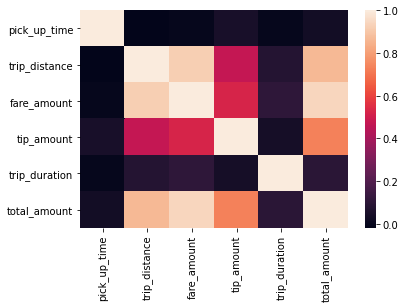

In [27]:
sns.heatmap(yellow_01[CORR_COLS].corr())
plt.savefig("heatmap")
plt.show()